In [138]:
#Importing Libraries
from data_loader import FootballDataLoader
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM, GRU

Reading game 1: Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Loading Game_FCK_RFC_Score_1_1_Day_2024-08-04Z.pkl
Data read.
Time shape: (155541, 2)
Ball shape: (155541, 6)
Team shape: (155541, 75)
Opponent shape: (155541, 80)
Total shape: (88002, 163)

=== DataFrame Overview ===
Shape: (88002, 163)

Columns:
['Time', 'half', 'Ball_x', 'Ball_y', 'game', 'Ball_z', 'Ball_Speed?', 'Ball_Col5', 'FCKplayer_1_x', 'FCKplayer_1_y', 'FCKplayer_1_z', 'FCKplayer_1_speed_x', 'FCKplayer_1_number', 'FCKplayer_2_x', 'FCKplayer_2_y', 'FCKplayer_2_z', 'FCKplayer_2_speed_x', 'FCKplayer_2_number', 'FCKplayer_4_x', 'FCKplayer_4_y', 'FCKplayer_4_z', 'FCKplayer_4_speed_x', 'FCKplayer_4_number', 'FCKplayer_8_x', 'FCKplayer_8_y', 'FCKplayer_8_z', 'FCKplayer_8_speed_x', 'FCKplayer_8_number', 'FCKplayer_10_x', 'FCKplayer_10_y', 'FCKplayer_10_z', 'FCKplayer_10_speed_x', 'FCKplayer_10_number', 'FCKplayer_11_x', 'FCKplayer_11_y', 'FCKplayer_11_z', 'FCKplayer_11_speed_x', 'FCKplayer_11_number', 'FCKplayer_13_x', 'FCKpl

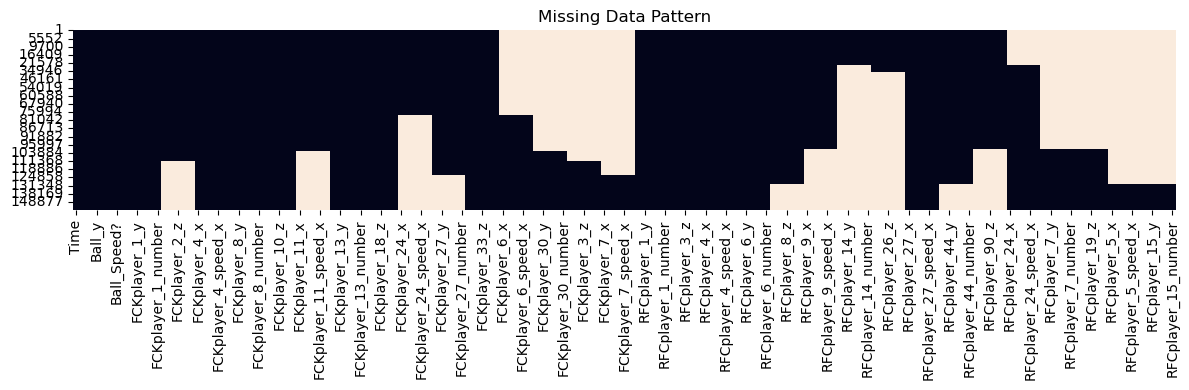

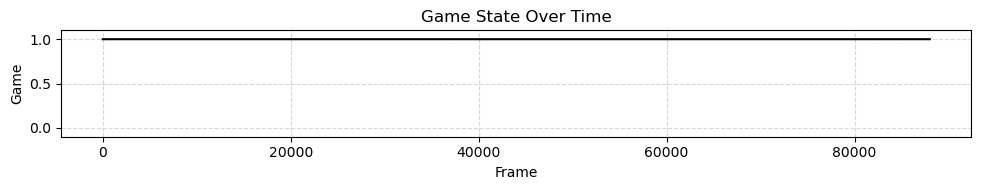

In [139]:
#Getting the data
data_dir = r"\Users\kirlo\Documents\Sanvi University Work\Year 3\AML\final project\FootballData\RestructuredData_2425"  # replace with your actual data directory
team = "FCK"         
data_retriever = FootballDataLoader(data_dir, team)
all_games = data_retriever.load_all_games()
game = all_games[0]

In [140]:
game

,Time,half,Ball_x,Ball_y,game,Ball_z,Ball_Speed?,Ball_Col5,FCKplayer_1_x,FCKplayer_1_y,...,RFCplayer_5_x,RFCplayer_5_y,RFCplayer_5_z,RFCplayer_5_speed_x,RFCplayer_5_number,RFCplayer_15_x,RFCplayer_15_y,RFCplayer_15_z,RFCplayer_15_speed_x,RFCplayer_15_number
1,0.04,1,-0.14,0.06,1,0.33,1.66,0,-38.63,-0.38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.08,1,-0.14,0.06,1,0.33,1.65,0,-38.64,-0.37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.12,1,-0.24,0.02,1,0.33,1.63,0,-38.65,-0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.16,1,-0.31,-0.01,1,0.33,1.61,0,-38.66,-0.35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.20,1,-0.38,-0.03,1,0.33,1.59,0,-38.67,-0.33,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155467,5792.80,2,30.52,4.80,1,3.06,4.95,1,-23.06,-0.20,...,38.83,1.06,0.0,3.07,5.0,37.62,-12.39,0.0,2.40,15.0
155468,5792.84,2,30.34,4.89,1,2.65,4.84,1,-23.05,-0.18,...,38.74,1.13,0.0,3.10,5.0,37.64,-12.29,0.0,2.37,15.0
155469,5792.88,2,30.14,4.97,1,2.24,4.69,1,-23.04,-0.16,...,38.64,1.21,0.0,3.13,5.0,37.67,-12.20,0.0,2.39,15.0
155470,5792.92,2,29.98,5.05,1,1.87,4.54,1,-23.03,-0.14,...,38.54,1.29,0.0,3.20,5.0,37.70,-12.11,0.0,2.34,15.0


In [141]:
#Standardising data
from sklearn.preprocessing import StandardScaler

# Suppose your DataFrame is called `df` and you want to normalize all columns
scaler = StandardScaler()
normalized_game = pd.DataFrame(scaler.fit_transform(game), columns=game.columns)


In [142]:
#Dropping unnecessary columns
position_columns = [
    col for col in normalized_game.columns 
    if (
        ('player' in col and (col.endswith('_x') or col.endswith('_y') or 'speed' in col)) or
        ('ball' in col.lower() and (col.endswith('_x') or col.endswith('_y') or col.endswith('_z') or 'speed' in col.lower()))
    )
]

game_reduced = normalized_game[position_columns]

In [143]:
print(game_reduced.columns) #this is basically to help find target colums in the next step. will look into
# an easier way to find column index



Index(['Ball_x', 'Ball_y', 'Ball_z', 'Ball_Speed?', 'FCKplayer_1_x',
       'FCKplayer_1_y', 'FCKplayer_1_speed_x', 'FCKplayer_2_x',
       'FCKplayer_2_y', 'FCKplayer_2_speed_x', 'FCKplayer_4_x',
       'FCKplayer_4_y', 'FCKplayer_4_speed_x', 'FCKplayer_8_x',
       'FCKplayer_8_y', 'FCKplayer_8_speed_x', 'FCKplayer_10_x',
       'FCKplayer_10_y', 'FCKplayer_10_speed_x', 'FCKplayer_11_x',
       'FCKplayer_11_y', 'FCKplayer_11_speed_x', 'FCKplayer_13_x',
       'FCKplayer_13_y', 'FCKplayer_13_speed_x', 'FCKplayer_18_x',
       'FCKplayer_18_y', 'FCKplayer_18_speed_x', 'FCKplayer_24_x',
       'FCKplayer_24_y', 'FCKplayer_24_speed_x', 'FCKplayer_27_x',
       'FCKplayer_27_y', 'FCKplayer_27_speed_x', 'FCKplayer_33_x',
       'FCKplayer_33_y', 'FCKplayer_33_speed_x', 'FCKplayer_6_x',
       'FCKplayer_6_y', 'FCKplayer_6_speed_x', 'FCKplayer_30_x',
       'FCKplayer_30_y', 'FCKplayer_30_speed_x', 'FCKplayer_3_x',
       'FCKplayer_3_y', 'FCKplayer_3_speed_x', 'FCKplayer_7_x',
       'FCK

In [144]:

#exclude_cols = ['FCKplayer_2_x', 'FCKplayer_2_y']
input_data = game_reduced#.drop(columns=exclude_cols) #pls ignore this line

window_size = 250      # length of the input sequence
horizon = 250          # how far ahead to predict
target_cols = [0, 1]  #this basically tells us what we wanna predict. i can just add more columns here if we wanna find positions throughout a whole game

def create_sequences(data, time_steps, future_steps, target_cols):
    sequences = []
    targets = []
    for i in range(len(data) - time_steps - future_steps + 1):
        input_seq = data[i : i + time_steps]  
        future_point = data[i + time_steps + future_steps - 1]
        target = future_point[target_cols]   
        sequences.append(input_seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)


input, targets = create_sequences(input_data.values, window_size, horizon, target_cols)


In [ ]:
#Padding the data
pad_value = 0.0 #Set this to 0 for now. Doesnt make much sense to me but it works i guess
padded_input = np.nan_to_num(input, nan=pad_value)
padded_targets = np.nan_to_num(targets, nan=pad_value)

#Making sure the data is all float32 because tensorflow is a bit picky about this and the masking might not work otherwise
padded_input = padded_input.astype(np.float32)
padded_targets = padded_targets.astype(np.float32)
pad_value = np.float32(pad_value)  


In [ ]:
print(padded_input.dtype)
print(padded_targets.dtype)
print(type(pad_value))

float32
float32
<class 'numpy.float32'>


In [ ]:
#Splitting the data
input_train, input_test, target_train, target_test = train_test_split(
    padded_input, padded_targets, test_size=0.2, random_state=42
)

In [ ]:
input_train.shape, target_train.shape, input_test.shape, target_test.shape



((70354, 50, 97), (70354, 2), (17589, 50, 97), (17589, 2))

In [ ]:
from tensorflow.keras.layers import Masking
#Building the GRU

model = Sequential()


model.add(Masking(mask_value=pad_value, input_shape=input_train.shape[1:])) #I dont know if this actually is doing anything
model.add(GRU(64, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(32, return_sequences=False))
model.add(Dense(64, activation='relu'))
model.add(Dense(target_train.shape[-1], activation='linear'))  # Output layer for regression
model.compile(optimizer='adam', loss='mse', metrics=['mae'])




c:\Users\kirlo\anaconda3\Lib\site-packages\keras\src\layers\core\masking.py:48: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
print(target_train.shape)
# (70354, 2)


(70354, 2)


In [ ]:
#Training the model
history = model.fit(input_train, target_train, epochs=1, batch_size=32, validation_split=0.2) #i set epochs as 1 to save time. we should increase this



1759/1759 ━━━━━━━━━━━━━━━━━━━━ 89s 48ms/step - loss: 0.9593 - mae: 0.8268 - val_loss: 0.9400 - val_mae: 0.8173


In [ ]:
#Making predictions
predictions = model.predict(input_test)


550/550 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step


In [ ]:
target_x = target_test[:, 0]
target_y = target_test[:, 1]
pred_x = predictions[:, 0]
pred_y = predictions[:, 1]


RMSE (X): 0.9544
RMSE (Y): 0.9894


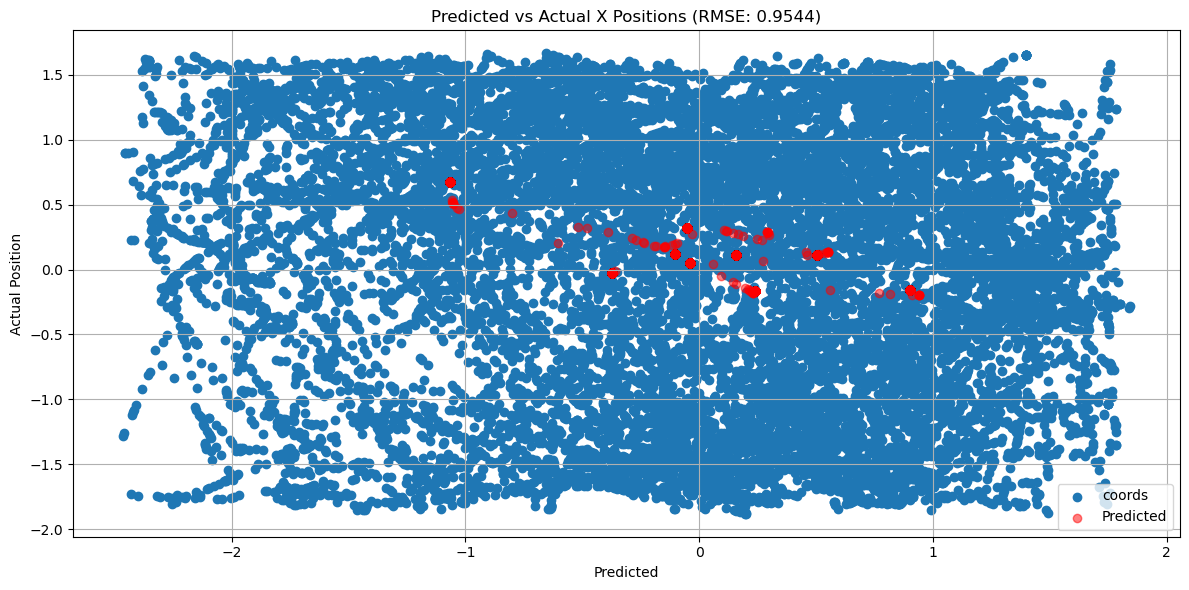

In [ ]:
from sklearn.metrics import mean_squared_error
rmse_x = np.sqrt(mean_squared_error(target_x, pred_x))
print(f'RMSE (X): {rmse_x:.4f}')
rmse_y = np.sqrt(mean_squared_error(target_y, pred_y))
print(f'RMSE (Y): {rmse_y:.4f}')

plt.figure(figsize=(12, 6))
#plt.scatter(pred_x,target_x, label='Actual X', color='blue')
#plt.scatter(pred_y,target_y, label='Actual Y', color='orange')
plt.scatter(target_x,target_y, label ='coords')
plt.scatter(pred_x, pred_y, label='Predicted', color='red', alpha=0.5)
plt.title(f'Predicted vs Actual X Positions (RMSE: {rmse_x:.4f})')
plt.xlabel('Predicted')
plt.ylabel('Actual Position')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
